In [4]:
import networkx as nx
import osmnx as ox

%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.1.0'

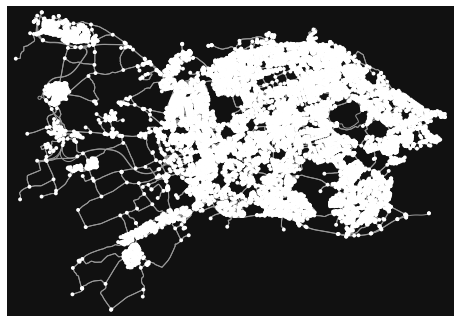

In [5]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place("City of Edinburgh", network_type="drive")
fig, ax = ox.plot_graph(G)

In [6]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

263364609.84393582

In [7]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

{'n': 13196,
 'm': 30488,
 'k_avg': 4.6207941800545616,
 'edge_length_total': 2974177.5529999905,
 'edge_length_avg': 97.55239940304351,
 'streets_per_node_avg': 2.455592603819339,
 'streets_per_node_counts': {0: 0,
  1: 3903,
  2: 86,
  3: 8522,
  4: 666,
  5: 15,
  6: 4},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2957714458926948,
  2: 0.006517126401939982,
  3: 0.6458017581085177,
  4: 0.05046983934525614,
  5: 0.0011367080933616248,
  6: 0.0003031221582297666},
 'intersection_count': 9293,
 'street_length_total': 1608962.1739999896,
 'street_segment_count': 16202,
 'street_length_avg': 99.30639266757126,
 'circuity_avg': 1.0732237782403633,
 'self_loop_proportion': 0.007900259227255894,
 'clean_intersection_count': 7353,
 'node_density_km': 50.105441303672755,
 'intersection_density_km': 35.28568248219391,
 'edge_density_km': 11293.003850298734,
 'street_density_km': 6109.257333221141,
 'clean_intersection_density_km': 27.91946877128719}

In [ ]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

In [ ]:
# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

In [ ]:
# impute missing edge speeds and calculate edge travel times with the speed module
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)

In [ ]:
# get the nearest network nodes to two lat/lng points with the distance module
dest = ox.distance.nearest_nodes(G, X=-3.195144, Y=55.953822)
orig = ox.distance.nearest_nodes(G, X=-3.174398, Y=55.956135)

In [ ]:
# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [ ]:
# how long is our route in meters?
edge_lengths = ox.utils_graph.get_route_edge_attributes(G, route, "length")
round(sum(edge_lengths))

In [ ]:
# how far is it between these two nodes as the crow flies?
# use OSMnx's vectorized great-circle distance (haversine) function
orig_x = G.nodes[orig]["x"]
orig_y = G.nodes[orig]["y"]
dest_x = G.nodes[dest]["x"]
dest_y = G.nodes[dest]["y"]
round(ox.distance.great_circle_vec(orig_y, orig_x, dest_y, dest_x))

In [ ]:
# add elevation to nodes automatically, calculate edge grades, plot network
# you need a google elevation api key to run this cell!
#try:
 #   from keys import google_elevation_api_key

#    G = ox.elevation.add_node_elevations_google(G, api_key=google_elevation_api_key)
 #   G = ox.elevation.add_edge_grades(G)
  #  nc = ox.plot.get_node_colors_by_attr(G, "elevation", cmap="plasma")
   # fig, ax = ox.plot_graph(G, node_color=nc, node_size=20, edge_linewidth=2, edge_color="#333")
#except ImportError:
 #   print("You need a google_elevation_api_key to run this cell.")

In [ ]:
# or get network by address, coordinates, bounding box, or any custom polygon
# ...useful when OSM just doesn't already have a polygon for the place you want
#wurster_hall = (37.870605, -122.254830)
#one_mile = 1609  # meters
#G = ox.graph_from_point(wurster_hall, dist=one_mile, network_type="drive")
#fig, ax = ox.plot_graph(G, node_size=0)

In [ ]:
# get NY subway rail network
G = ox.graph_from_place(
    "City of Edinburgh",
    retain_all=False,
    truncate_by_edge=True,
    simplify=True,
    custom_filter='["railway"]',
)

fig, ax = ox.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)

In [ ]:
# get all building footprints in some neighborhood
place = "City of Edinburgh"
tags = {"building": True}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

In [ ]:
fig, ax = ox.plot_footprints(gdf, figsize=(3, 3))

In [ ]:
# get all parks and bus stops in some neighborhood
tags = {"leisure": "park", "highway": "bus_stop"}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

In [ ]:
# get the boundary polygon for edinburgh, project it, and plot it
city = ox.geocode_to_gdf("City of Edinburgh")
city_proj = ox.project_gdf(city)
ax = city_proj.plot(fc="gray", ec="none")
_ = ax.axis("off")